In [4]:
# from google.colab import drive
# drive.mount("/content/drive")

# import os
# os.chdir('/content/drive/MyDrive/根據區域微氣候資料預測發電量競賽')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
# 讀取資料
df = pd.read_csv('L3_Train.csv')
df

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,3,2024-03-09 14:06:42.000,0.00,1015.57,17.52,50.71,7444.58,12.28
1,3,2024-03-09 14:07:38.000,2.00,1015.57,17.71,50.37,8425.83,16.26
2,3,2024-03-09 14:08:38.000,3.05,1015.65,17.71,49.53,9068.33,18.32
3,3,2024-03-09 14:09:38.000,3.14,1015.71,17.70,50.13,8687.50,16.49
4,3,2024-03-09 14:10:38.000,3.40,1015.71,17.64,50.09,8210.00,14.88
...,...,...,...,...,...,...,...,...
55375,3,2024-07-10 11:06:07.000,0.00,1003.94,47.05,38.20,117758.20,1489.19
55376,3,2024-07-10 11:07:07.000,0.00,1003.96,47.07,38.27,117758.20,1491.42
55377,3,2024-07-10 11:08:07.000,0.00,1003.99,47.15,37.53,117758.20,1496.63
55378,3,2024-07-10 11:09:07.000,0.00,1003.90,46.53,38.03,117758.20,1506.62


In [7]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,55380.0,55380.000000,55380.000000,55380.000000,55380.000000,55380.000000,55380.000000
mean,3.0,0.397456,1007.682379,30.697832,69.215456,26485.444595,320.369273
std,0.0,0.819855,4.874686,8.376141,25.795770,31092.301453,529.486801
min,3.0,0.000000,994.240000,12.450000,15.220000,20.000000,0.000000
25%,3.0,0.000000,1004.010000,23.890000,45.290000,4275.000000,5.060000
50%,3.0,0.000000,1007.120000,29.370000,70.030000,13467.085000,50.620000
75%,3.0,0.440000,1011.290000,37.370000,99.240000,36791.325000,353.415000
max,3.0,9.670000,1022.130000,54.150000,100.000000,117758.200000,2459.300000


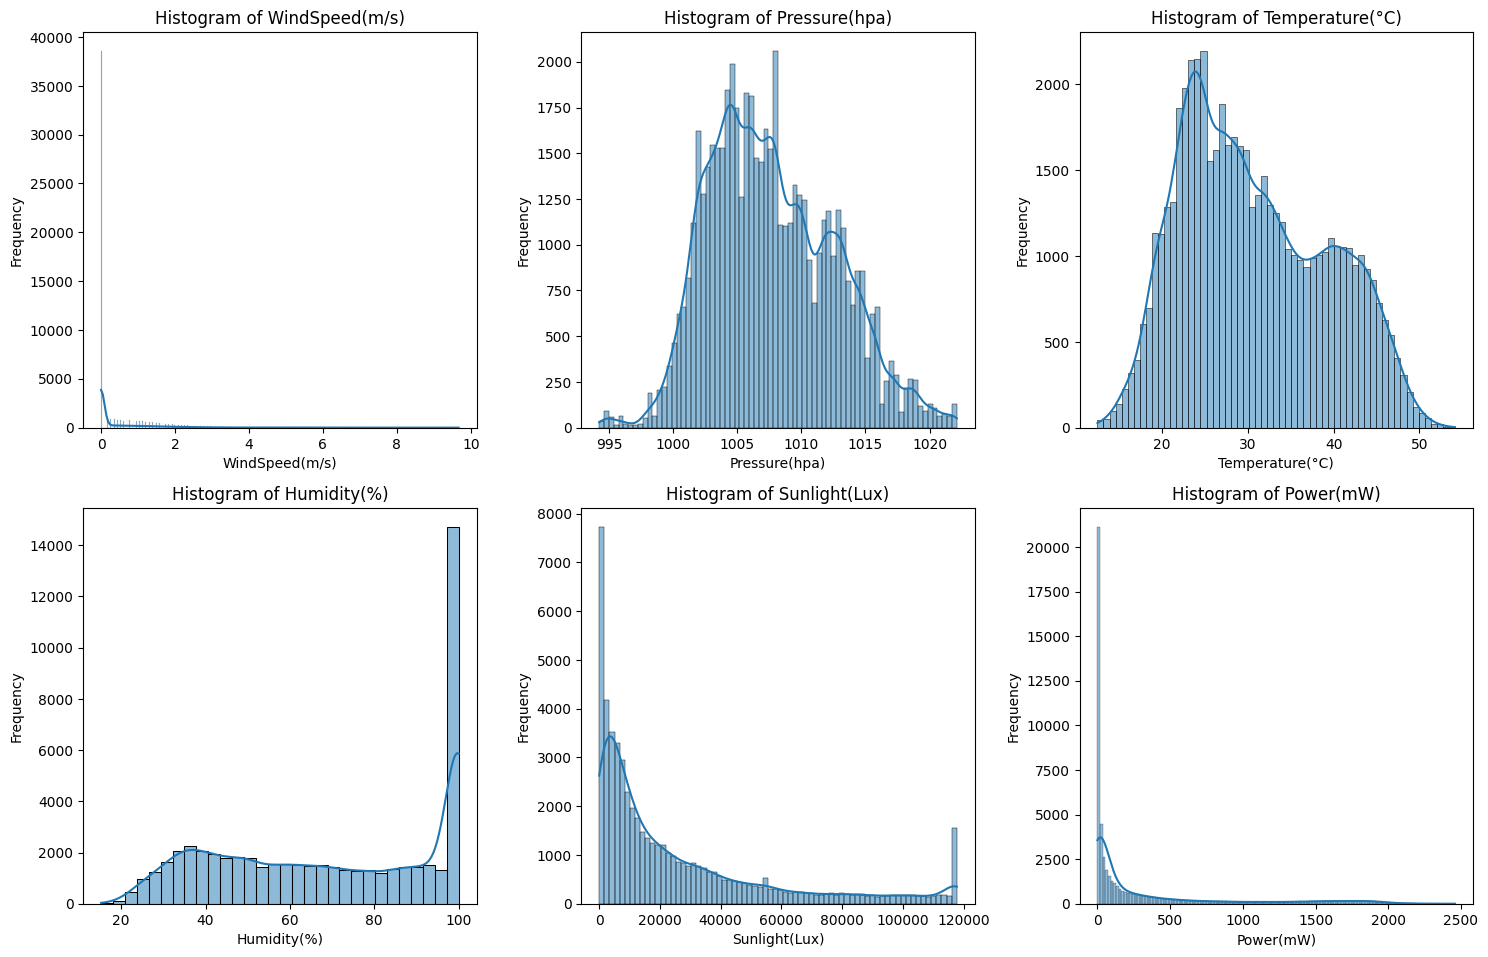

In [ ]:
# 繪製直方圖
use_columns = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
# 篩選Sunlight(Lux)最大值
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] == max_sunlight]
df_filtered

,LocationCode,DateTime,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
1196,3,2024-03-11 09:28:38.000,3.22,1014.03,30.26,38.06,117758.2,2034.40
1197,3,2024-03-11 09:29:38.000,1.83,1014.08,31.94,35.95,117758.2,2273.67
1198,3,2024-03-11 09:30:38.000,2.96,1013.96,33.02,33.33,117758.2,2233.29
1199,3,2024-03-11 09:31:38.000,3.31,1014.00,33.52,31.04,117758.2,2210.90
1200,3,2024-03-11 09:32:38.000,3.92,1013.99,33.46,31.06,117758.2,2214.36
...,...,...,...,...,...,...,...,...
55375,3,2024-07-10 11:06:07.000,0.00,1003.94,47.05,38.20,117758.2,1489.19
55376,3,2024-07-10 11:07:07.000,0.00,1003.96,47.07,38.27,117758.2,1491.42
55377,3,2024-07-10 11:08:07.000,0.00,1003.99,47.15,37.53,117758.2,1496.63
55378,3,2024-07-10 11:09:07.000,0.00,1003.90,46.53,38.03,117758.2,1506.62


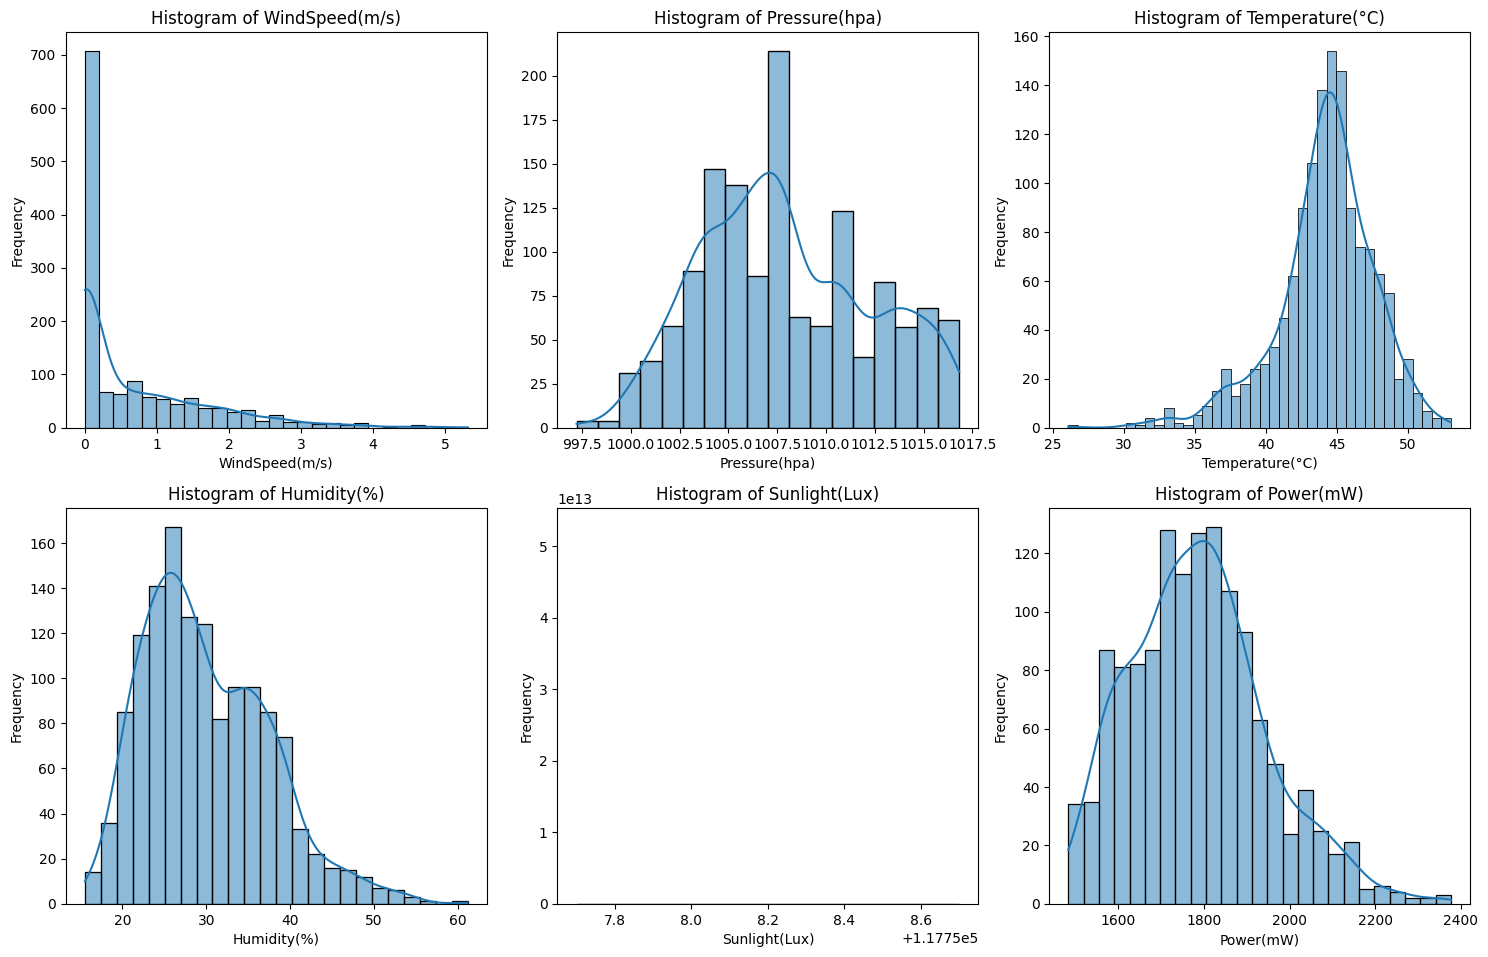

In [ ]:
# 繪製直方圖
use_columns = df_filtered[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)' ,'Power(mW)']]
plt.figure(figsize=(15, 14))
for i , columns in enumerate(use_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_filtered[columns] , kde=True)
    plt.title("Histogram of {}".format(columns))
    plt.xlabel(columns)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [12]:
# 利用迴歸分析先分析Sunlight(Lux)數值尚未達到最大值前的Sunlight(Lux)對Power(mW)的比率，回推Power(mW)所產生的Sunlight(Lux)
from sklearn.linear_model import LinearRegression

# 步驟 1：篩選資料（過濾 Sunlight(Lux) 未達到最大值的數據）
max_sunlight = df['Sunlight(Lux)'].max()
df_filtered = df[df['Sunlight(Lux)'] < max_sunlight]

# 步驟 2：設定自變數與因變數
X = df_filtered[['Sunlight(Lux)']]  # 自變數 (Sunlight)
y = df_filtered['Power(mW)']        # 因變數 (Power)

# 步驟 3：建立線性迴歸模型並進行訓練
model = LinearRegression()
model.fit(X, y)

# 顯示迴歸係數和截距
slope = model.coef_[0]
intercept = model.intercept_

print(f'回歸方程：Power(mW) = {slope:.4f} * Sunlight(Lux) + {intercept:.4f}')

回歸方程：Power(mW) = 0.0161 * Sunlight(Lux) + -105.0951


In [13]:
def calculate_sunlight(power):
    sunlight = (power - intercept) / slope
    return sunlight
slope = 0.0161
intercept = -105.0951

# 複製df_filtered
df_filtered = df[df['Sunlight(Lux)'] == df['Sunlight(Lux)'].max()].copy()

# 使用 .loc 指定修改列中的欄位，回推Sunlight(Lux)
df_filtered['Recalculated Sunlight(Lux)'] = df_filtered['Power(mW)'].apply(calculate_sunlight)

# 更新原始df中的Sunlight(Lux)欄位
df.loc[df_filtered.index, 'Sunlight(Lux)'] = df_filtered['Recalculated Sunlight(Lux)']
# df

In [14]:
df.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,55380.0,55380.000000,55380.000000,55380.000000,55380.000000,55380.000000,55380.000000
mean,3.0,0.397456,1007.682379,30.697832,69.215456,26478.021399,320.369273
std,0.0,0.819855,4.874686,8.376141,25.795770,31109.118487,529.486801
min,3.0,0.000000,994.240000,12.450000,15.220000,20.000000,0.000000
25%,3.0,0.000000,1004.010000,23.890000,45.290000,4275.000000,5.060000
50%,3.0,0.000000,1007.120000,29.370000,70.030000,13467.085000,50.620000
75%,3.0,0.440000,1011.290000,37.370000,99.240000,36791.325000,353.415000
max,3.0,9.670000,1022.130000,54.150000,100.000000,154168.018634,2459.300000


In [15]:
df['LocationCode'] = df['LocationCode'].apply(lambda x: f'{x:02d}')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y-%m-%d %H:%M:%S.%f')

# 提取日期時間的相關特徵
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Minute'] = df['DateTime'].dt.minute
df['Second'] = df['DateTime'].dt.second
df['Weekday'] = df['DateTime'].dt.weekday

df['DateTime'] = df['Year'].astype(str).str.zfill(4) + \
                    df['Month'].astype(str).str.zfill(2) + \
                    df['Day'].astype(str).str.zfill(2) + \
                    df['Hour'].astype(str).str.zfill(2) + \
                    df['Minute'].astype(str).str.zfill(2) + \
                    df['Second'].astype(str).str.zfill(2)
df = df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second' ,'Weekday'], axis=1)
df['DateTime'] = df['DateTime'].astype('int64')
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%Y%m%d%H%M%S')

# 每10筆資料合併成一筆並計算平均值
# 使用 `groupby` 和 `agg` 方法
df = df.groupby(df.index // 10).agg({
    'LocationCode': 'first',  # 取第一筆的 LocationCode
    'DateTime': 'first',  # 取第一筆的 DateTime
    'WindSpeed(m/s)': 'mean',
    'Pressure(hpa)': 'mean',
    'Temperature(°C)': 'mean',
    'Humidity(%)': 'mean',
    'Sunlight(Lux)': 'mean',
    'Power(mW)': 'mean',
}).reset_index(drop=True)

df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']] = df[['WindSpeed(m/s)', 'Pressure(hpa)', 'Temperature(°C)', 'Humidity(%)', 'Sunlight(Lux)', 'Power(mW)']].round(2)

# 將 DateTime 列轉換回原格式
df['DateTime'] = df['DateTime'].dt.strftime('%Y%m%d%H%M%S')

In [16]:
# 將 LocationCode 轉換為字符串
df['LocationCode'] = df['LocationCode'].astype(str)

# 修改 DateTime 的最後兩位數為 LocationCode 的值
df['DateTime'] = df['DateTime'].str.slice(0, -2) + df['LocationCode']

df = df.rename(columns={'DateTime': 'Serial'}) #　序號
df['Serial'] = df['Serial'].astype('int64')
df = df.drop(['LocationCode'], axis=1)
df

,Serial,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
0,20240309140603,2.45,1015.65,17.77,49.96,9524.54,20.77
1,20240309141603,2.06,1015.63,18.50,48.22,11856.50,30.69
2,20240309142603,1.84,1015.66,18.38,48.17,10658.00,25.97
3,20240309143603,1.80,1015.79,18.09,49.10,8995.67,18.39
4,20240309144603,1.65,1015.78,18.08,49.80,9882.42,22.99
...,...,...,...,...,...,...,...
5533,20240710102103,0.00,1004.25,46.07,37.78,108415.70,1437.28
5534,20240710103103,0.00,1004.25,45.62,39.31,111713.33,1465.01
5535,20240710104103,0.00,1004.20,45.87,39.16,114796.05,1484.98
5536,20240710105103,0.00,1004.04,46.51,38.30,101236.36,1496.00


# HEATMAP

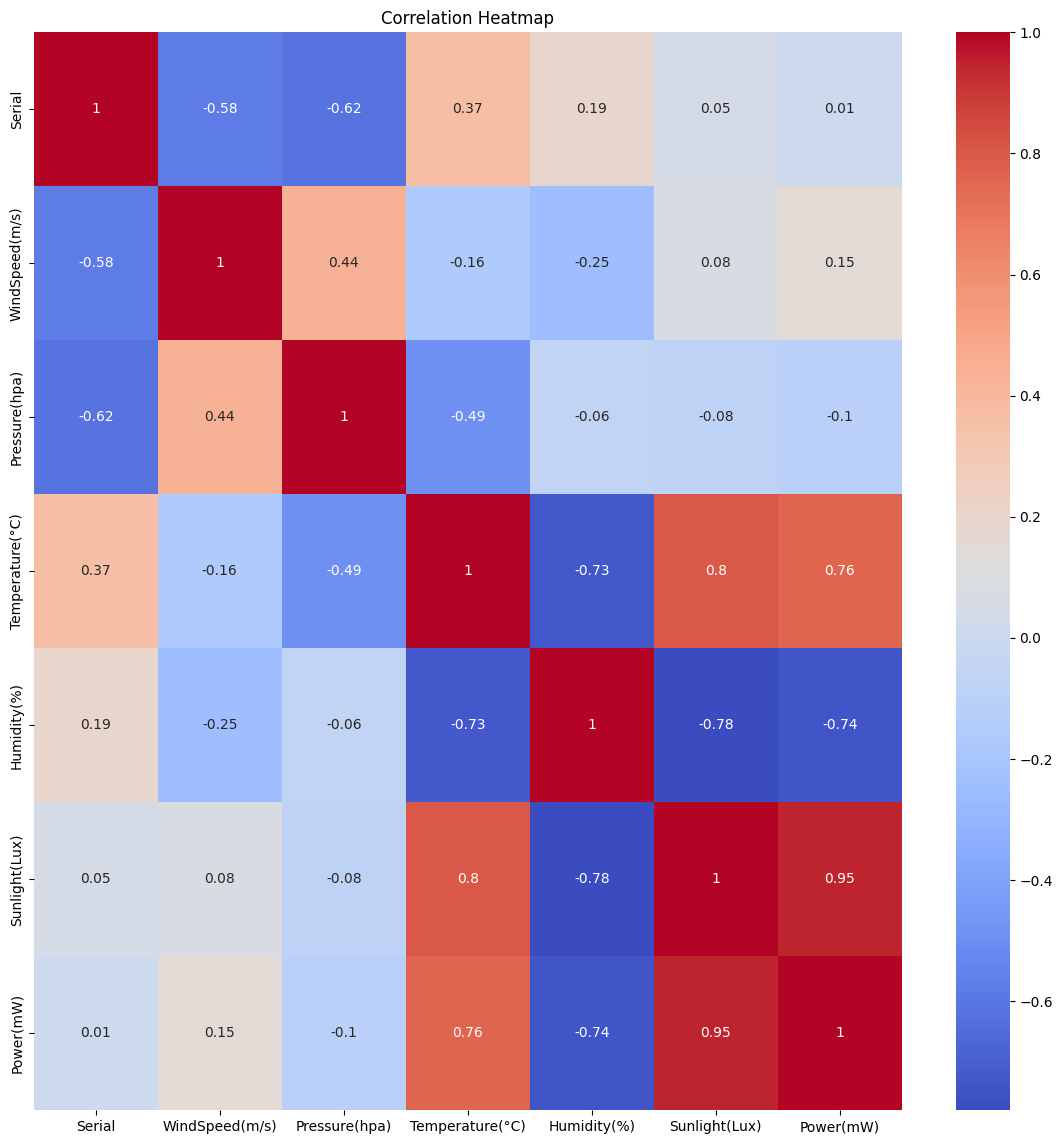

In [ ]:
# 繪製熱力圖
plt.figure(figsize=(14, 14))

corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# 相關性絕對值
correlation = df.corr().abs()
top_10_features = correlation['Power(mW)'].sort_values(ascending=False).head(11)
top_10_features

Power(mW)          1.000000
Sunlight(Lux)      0.950415
Temperature(°C)    0.760694
Humidity(%)        0.739741
WindSpeed(m/s)     0.150079
Pressure(hpa)      0.098554
Serial             0.014763
Name: Power(mW), dtype: float64

In [19]:
df.to_csv('L3_Train_Revise.csv', index=False)